In [1]:
import numpy as np
import pandas as od
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import cifar10

In [6]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 39s 0us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

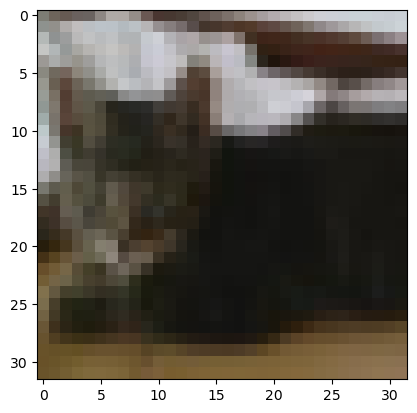

In [10]:
plt.imshow(x_train[9])

In [11]:
x_train = x_train/255

In [12]:
x_test = x_test/255

In [13]:
x_test.shape

(10000, 32, 32, 3)

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor="val_loss",patience=2)

In [24]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.3636 - loss: 1.7348 - val_accuracy: 0.5186 - val_loss: 1.3497
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5676 - loss: 1.2258 - val_accuracy: 0.5992 - val_loss: 1.1370
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6321 - loss: 1.0494 - val_accuracy: 0.5876 - val_loss: 1.1727
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6752 - loss: 0.9342 - val_accuracy: 0.6433 - val_loss: 1.0272
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7132 - loss: 0.8239 - val_accuracy: 0.6690 - val_loss: 0.9639
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7365 - loss: 0.7477 - val_accuracy: 0.6603 - val_loss: 1.0044
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7642 - loss: 0.6754 - val_accuracy: 0.6726 - val_loss: 0.9791


In [26]:
metrics = od.DataFrame(model.history.history)

In [27]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.44914,1.521126,0.5186,1.349738
1,0.58070,1.188551,0.5992,1.136962
2,0.63504,1.038946,0.5876,1.172713
3,0.67498,0.929118,0.6433,1.027187
4,0.71050,0.834361,0.6690,0.963948
5,0.73212,0.764114,0.6603,1.004423
6,0.76008,0.689060,0.6726,0.979126


In [28]:
metrics.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

<Axes: >

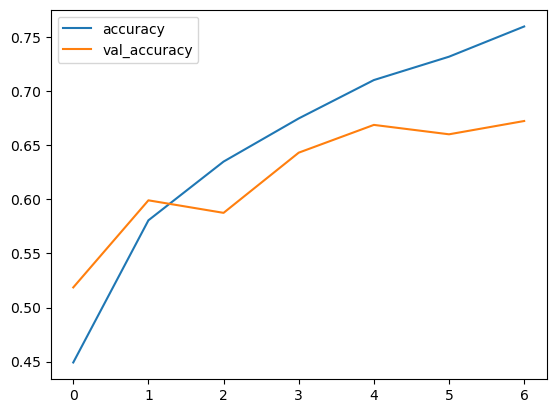

In [30]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

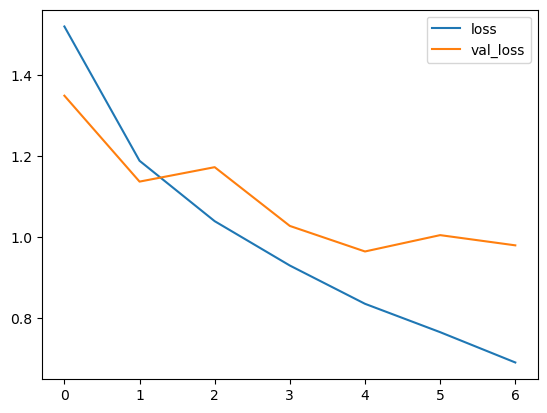

In [31]:
metrics[['loss', 'val_loss']].plot()

In [32]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9791257977485657, 0.6725999712944031]

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
preds_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [35]:
predictions = np.argmax(preds_prob, axis=1)

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.79      0.81      0.80      1000
           2       0.56      0.53      0.55      1000
           3       0.48      0.50      0.49      1000
           4       0.60      0.66      0.63      1000
           5       0.63      0.52      0.57      1000
           6       0.73      0.79      0.76      1000
           7       0.68      0.74      0.71      1000
           8       0.83      0.72      0.77      1000
           9       0.79      0.70      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [37]:
confusion_matrix(y_test,predictions)

array([[752,  20,  75,  22,  16,   3,  13,  10,  61,  28],
       [ 33, 813,   9,  13,   2,   6,  15,  11,  22,  76],
       [ 66,   8, 528,  78, 118,  58,  83,  40,  11,  10],
       [ 23,  14,  81, 503,  86, 134,  75,  50,  10,  24],
       [ 30,   5,  72,  62, 657,  21,  48,  93,   9,   3],
       [ 16,   4,  65, 194,  64, 521,  33,  91,   4,   8],
       [  6,   4,  43,  58,  54,  20, 792,  13,   2,   8],
       [ 25,   2,  37,  51,  78,  45,  13, 736,   4,   9],
       [111,  49,  16,  40,  15,  13,   8,   7, 722,  19],
       [ 63, 112,  11,  27,  10,   9,  11,  29,  26, 702]], dtype=int64)

<Axes: >

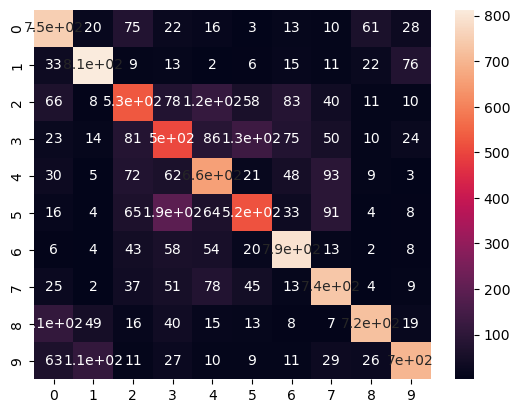

In [38]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [42]:
my_image = x_test[0]

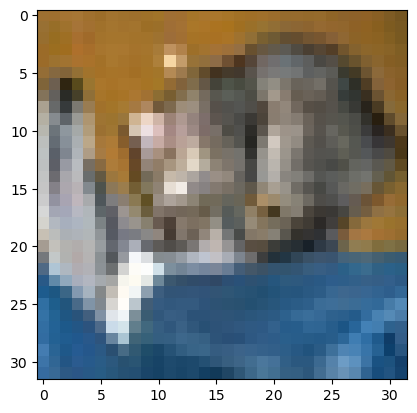

In [43]:
plt.imshow(my_image)

In [45]:
y_test[0]

array([3], dtype=uint8)

In [47]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([3], dtype=int64)